In [2]:
import mastermind as mm
import numpy as np
import operator
import random
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl

2.1187228268618874
[51.77469135802469, 51.77469135802469, 51.77469135802469, 51.77469135802469, 51.77469135802469, 51.77469135802469]
(0, 2)


In [3]:
colours = 8
places = 5

starting_set = mm.Set(places, colours)
s = mm.Set(places, colours)
s.beginning_set()
g = mm.Guess("01234")
pr = g.proba(s)
g.entropy()
#pr = g.distribution

In [4]:
print(s.cardinal)
r =  s.new_set("01234", (0,5))
r02 = s.new_set("01234", (0,2))

r.cardinal
r02.cardinal

32768.0


7070

In [5]:
gi = mm.Guess("56700")
the_set = r
print(the_set.cardinal)
pri = gi.proba(the_set)
gi.entropy()
gi.ent

44


0.6931471805599453

In [6]:
print(r.positions)

['42310', '24310', '32410', '23410', '43120', '34120', '14320', '13420', '32140', '23140', '12340', '42301', '24301', '32401', '23401', '43021', '34021', '40321', '30421', '32041', '23041', '20341', '43102', '34102', '14302', '13402', '43012', '34012', '40312', '30412', '13042', '30142', '10342', '42103', '24103', '12403', '42013', '24013', '20413', '14023', '40123', '10423', '12043', '20143']


In [7]:
%timeit -n 50 mm.Guess("01234").response("12300")

5.22 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [8]:
code = list("12345")
code.index('5')

4

In [9]:
# all possible answers
all_responses = [(i,j) for i in range(6) for j in range(6) if i+j < 6]
len(all_responses)

21

In [10]:
#
def response2(code, guess):
    black = white = 0
    code = list(code)
    guess = list(guess)
    l = range(len(code))
    for i in l:
        if code[i] == guess[i]:
            black += 1
            code[i] = 'X'
        else:
            if guess[i] in code:
                white += 1
                code[code.index(guess[i])] = 'X'
    return (black, white)

def response2_l(code, guess):
    black = white = 0
    for i in range(len(code)):
        if code[i] == guess[i]:
            black += 1
            code[i] = 'X'
            guess[i] = 'X'
        else:
            if guess[i] in code:
                white += 1
                code[code.index(guess[i])] = 'X'
    return (black, white)

print(response2("12345", "00315"))
c = list("12345")
g = list("00315")
%timeit response2("12345", "00315")
%timeit response2_l(c, g)

(2, 1)
1.73 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.24 µs ± 162 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
print(g)

['0', '0', 'X', '1', 'X']


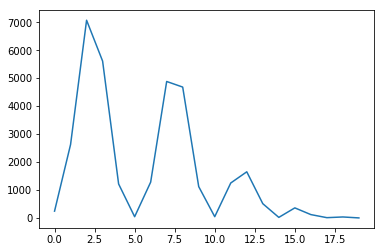

In [12]:
# histogram for 5 different colours
pr_plot = [pr[i][1] for i in range(len(pr))]
plt.plot(pr_plot)
plt.show()

In [13]:
# for the first try only 5 different possibilities (by symetry)
guess_list = ["01234", "00123", "00012", "00001", "00000"]

entrop_first = []
prs_plot = []

for g in guess_list:
    si = mm.Set(places, colours)
    si.beginning_set()
    gi = mm.Guess(g)
    pri = gi.proba(s)
    gi.entropy()
    entrop_first.append(gi.ent)
    pri_plot = [pri[i][1] for i in range(len(pri))]
    prs_plot.append(pri_plot)

In [70]:
entrop_first

[2.2399421321017403,
 2.2446239470098046,
 2.1230193638281203,
 1.8313223095301954,
 1.0170366574100151]

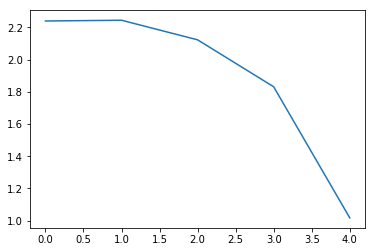

In [71]:
plt.plot(entrop_first)
plt.show()

In [6]:
[len(p) for p in prs_plot]

[20, 20, 19, 14, 6]

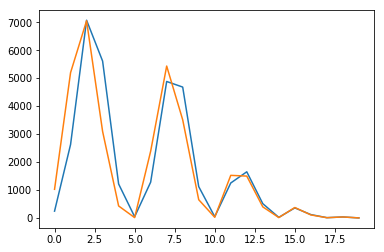

In [11]:

plt.plot(np.array(prs_plot[:2]).T)
plt.show()

In [319]:
def best_guess_distr(test_set):
    ret_f = {}
    init_set = mm.Set(places, colours)
    init_set.beginning_set()
    for g in init_set.positions:
        f = mm.Guess(g)
        f.proba(test_set)
        m = mm.get_dict_max(f.distribution)
        ret_f[g] = m[1]
    ret_s = sorted(ret_f.items(), key=operator.itemgetter(1))
    return ret_s

def best_guess_entr(test_set):
    ret_f = {}
    init_set = mm.Set(places, colours)
    init_set.beginning_set()
    i = 0
    for g in init_set.positions:
        f = mm.Guess(g)
        f.proba(test_set)
        f.entropy()
        m = mm.get_dict_max(f.distribution)
        ret_f[g] = round(f.ent,6)
        i += 1
        if i%1000 == 0:
            print(i)
    ret_s = sorted(ret_f.items(), key=operator.itemgetter(1))
    return ret_s

def bg_short(test_set):
    ret_f = {}
    init_set = mm.Set(places, colours)
    init_set.beginning_set()
    for g in init_set.positions:
        f = mm.Guess(g)
        f.proba(test_set)
        f.entropy()
        m = mm.get_dict_max(f.distribution)
        ret_f[g] = round(f.ent,6)
    ret_s = sorted(ret_f.items(), key=operator.itemgetter(1))
    return ret_s



In [45]:
result = best_guess_entr(r)

In [161]:
%timeit -n 3 best_guess_entr(r)

The slowest run took 50.84 times longer than the fastest. This could mean that an intermediate result is being cached.
55.9 s ± 1min 51s per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [46]:
result[-8:]

[('13042', 1.396959),
 ('30142', 1.396959),
 ('24103', 1.396959),
 ('12403', 1.396959),
 ('42013', 1.396959),
 ('20413', 1.396959),
 ('14023', 1.396959),
 ('40123', 1.396959)]

In [322]:
def best_guess_list(result_list):
    if len(result_list) == 1:
        return result_list
    ret = []
    best_entropy = result_list[-1][1]
    #print(best_entropy)
    i = 1
    while result_list[-i][1] >= best_entropy:
        ret.append(result_list[-i][0])
        i += 1
    return ret

print("nb of guesses: %s" %len(best_guess_list(result)))

nb of guesses: 24


In [103]:
r

'32410'

In [104]:
f = mm.Guess("42310")
f.proba(r)
f.distribution

{(5, 0): 1, (3, 2): 6, (2, 3): 7, (1, 4): 18, (0, 5): 12}

In [138]:
f = mm.Guess("20413")
f.proba(r)
f.distribution

{(1, 4): 15, (2, 3): 10, (3, 2): 5, (0, 5): 13, (5, 0): 1}

In [159]:
[pos for pos in r.positions if mm.Guess("20413").response(pos) == (3,2)]

['23410', '30412', '24013', '10423', '20143']

In [160]:
[pos for pos in r.positions if mm.Guess("42310").response(pos) == (3,2)]

['24310', '32410', '12340', '42301', '40312', '42013']

In [158]:
res_d = dict(result)
res_d["42310"]
r.cardinal

44

In [14]:
class Game:
    def __init__(self, places=5, colors=8, code = ""):
        self.places = places
        self.colors = colors
        self.guess_list = list()
        self.resp_list = list()
        self.set_list = list()
        init_set = mm.Set(places, colors)
        init_set.beginning_set()
        self.set_list.append(init_set)
        self.cur_move = 0
        if code == "":
            self.code = "".join([str(random.randint(0,colors-1)) for _ in range(places)])
        else: 
            self.code = code
        print("Code : ", self.code)
        
    def play(self, guess, response):

        cur_guess = mm.Guess(guess)
        self.guess_list.append(mm.Guess(guess))
        self.resp_list.append(response)
        self.set_list.append(self.set_list[self.cur_move].new_set(guess, response))
        self.cur_move += 1
    
    def automatic_play(self, play_function):
        while True or self.cur_move < 15:
            gu = play_function(self.set_list[self.cur_move])
            resp = mm.Guess(gu).response(self.code)
            self.play(gu , resp)
            print("Try %d: played %s, response %s, %d possiblities left" %(self.cur_move, gu, resp, 
                                                            self.set_list[self.cur_move].cardinal )) 
            if resp == (5,0):
                return self.cur_move
    

In [1]:
g = Game(code = "01234")
g.automatic_play(play_guess_random)

NameError: name 'Game' is not defined

In [218]:
def playguess_random(set_list):
    g = random.randint(0, set_list.cardinal-1)
    return set_list.positions[g]

def play_bg_entr(set_list):
    res = best_guess_entr(set_list)
    bg = best_guess_list(res)
    g = random.randint(0, len(bg)-1)
    return bg[g]

In [219]:
def play_bg_second(set_list):
    if set_list.cardinal > 30000:
        return("01234")
    else:
        return(play_bg_entr(set_list))

In [321]:
g = Game()
g.automatic_play(play_bg_second)

Code :  40003
Try 1: played 01234, response (0, 3), 5610 possiblities left
start
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
middle
Try 2: played 42367, response (1, 1), 744 possiblities left
start
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
middle
Try 3: played 47501, response (2, 0), 37 possiblities left
start
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
middle
Try 4: played 04003, response (3, 2), 1 possiblities left
start
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
2

IndexError: list index out of range

In [ ]:
g = Game(code = "40003")
g.automatic_play(play_guess_random)

In [227]:
%load_ext line_profiler

In [237]:
%lprun -f pro pro()

In [303]:
def proba(set_l, code ):
    occ = {}
    for elt in set_l.positions:
        rep = response2(code, elt)
        if rep in occ.keys():
            occ[rep] += 1
        else:
            occ[rep] = 1
    return sorted(occ.items(), key=operator.itemgetter(0))
%lprun -f proba proba(r02,"54260")
%timeit proba(r02,"54260")
proba(r02,"54260")

36 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


[((0, 0), 77),
 ((0, 1), 720),
 ((0, 2), 1973),
 ((0, 3), 1429),
 ((0, 4), 303),
 ((1, 0), 156),
 ((1, 1), 836),
 ((1, 2), 861),
 ((1, 3), 239),
 ((2, 0), 122),
 ((2, 1), 216),
 ((2, 2), 87),
 ((3, 0), 32),
 ((3, 1), 16),
 ((4, 0), 3)]

In [301]:
init_dict = dict.fromkeys(all_responses, 0)

In [305]:
def proba2(set_l, code ):
    occ = dict.fromkeys(all_responses, 0)
    for elt in set_l.positions:
        rep = response2(code, elt)
        occ[rep] += 1
    return sorted(occ.items(), key=operator.itemgetter(0))

%lprun -f proba2 proba2(r02,"54260")
%timeit proba2(r02,"54260")
proba2(r02,"54260")

34.5 ms ± 563 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


[((0, 0), 77),
 ((0, 1), 720),
 ((0, 2), 1973),
 ((0, 3), 1429),
 ((0, 4), 303),
 ((0, 5), 0),
 ((1, 0), 156),
 ((1, 1), 836),
 ((1, 2), 861),
 ((1, 3), 239),
 ((1, 4), 0),
 ((2, 0), 122),
 ((2, 1), 216),
 ((2, 2), 87),
 ((2, 3), 0),
 ((3, 0), 32),
 ((3, 1), 16),
 ((3, 2), 0),
 ((4, 0), 3),
 ((4, 1), 0),
 ((5, 0), 0)]

In [292]:
%lprun -f response2 response2("01234", "54260")

In [250]:
proba(r02,"54260")

[((0, 0), 77),
 ((0, 1), 720),
 ((0, 2), 1973),
 ((0, 3), 1429),
 ((0, 4), 303),
 ((1, 0), 156),
 ((1, 1), 836),
 ((1, 2), 861),
 ((1, 3), 239),
 ((2, 0), 122),
 ((2, 1), 216),
 ((2, 2), 87),
 ((3, 0), 32),
 ((3, 1), 16),
 ((4, 0), 3)]

In [290]:
def response3(code, guess):
    black, white = 0,0
    code = list(code)
    guess = list(guess)
    l = range(len(code))
    for i in l:
        if guess[i] == code[i]:
            black += 1
            code[i] = 'X'
        else:
            try:
                code[code.index(guess[i])] = 'X'
                white += 1
            except ValueError:
                pass
    return (black, white)

%lprun -f response3 response3("01234", "54260")

In [289]:
response3("01234", "54260")

(1, 2)

In [313]:
%timeit response2("01234", "54260")
%timeit response3("01234", "54260")

4.52 µs ± 344 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.79 µs ± 86.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [316]:
%lprun -f response2 response2("01234", "54260")

In [317]:
%lprun?

In [ ]:
%%cython
def f(a,b):
    return a*b

In [ ]:
sets = [[i+j % 8 for i in range 10 ] for j in range(10)]
codes = np.repeat(code, 10)

In [332]:
from itertools import product
col = list(range(colours))
print(col)
print(places)
a = col
for _ in range(2):
    a = list(product(a, col))
    
print(list(product(col,col)))
print(a)

[0, 1, 2, 3, 4, 5, 6, 7]
5
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
[((0, 0), 0), ((0, 0), 1), ((0, 0), 2), ((0, 0), 3), ((0, 0), 4), ((0, 0), 5), ((0, 0), 6), ((0, 0), 7), ((0, 1), 0), ((0, 1), 1), ((0, 1), 2), ((0, 1), 3), ((0, 1), 4), ((0, 1), 5), ((0, 1), 6), ((0, 1), 7), ((0, 2), 0), ((0, 2), 1), ((0, 2), 2), ((0, 2), 3), ((0, 2), 4), ((0, 2), 5), ((0, 2), 6), ((0, 2), 7), ((0, 3), 0), ((0, 3), 1), ((0, 3), 2), ((0, 3), 3), ((0, 3), 4), ((0, 3), 5), ((0, 3), 6), ((0, 3), 7), ((0, 4), 0), ((0, 4), 1), ((0, 4), 2), ((0,